# Итоговая работа.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline

## Задание 1


Вычислите производную функции:

$tg^2(sin(x) + cos(2x+3))$

в точке $x_0=1$


In [2]:
import sympy as sym
from sympy import *
import math

x = sym.Symbol('x')

#найдем первую производную первоначальной функции
func = sym.diff(tan(sin(x) + cos(2*x + 3))**2, x, 1)
func

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [3]:
#вычислим значение производной в точке 1
res = func.subs(x,1)
res

2*(1 + tan(cos(5) + sin(1))**2)*(cos(1) - 2*sin(5))*tan(cos(5) + sin(1))

In [4]:
#вычислим числовое значение
2*(1 + math.tan(math.cos(5) + math.sin(1))**2)*(math.cos(1) - 2*math.sin(5))*math.tan(math.cos(5) + math.sin(1))

55.385917635337854

## Задание 2

Дан объект в $2D$ пространстве

(-200.0, 200.0)

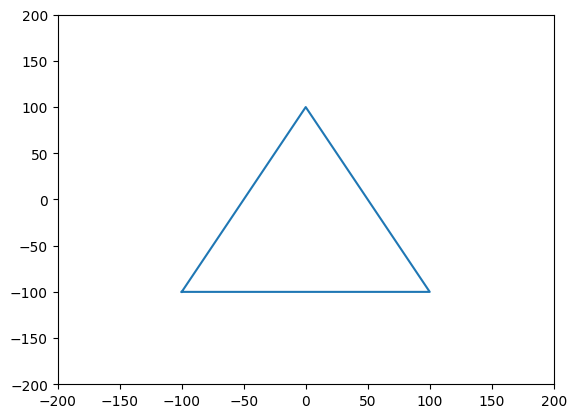

In [5]:
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

При помощи матричных операций выполните:
- Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)


(-200.0, 200.0)

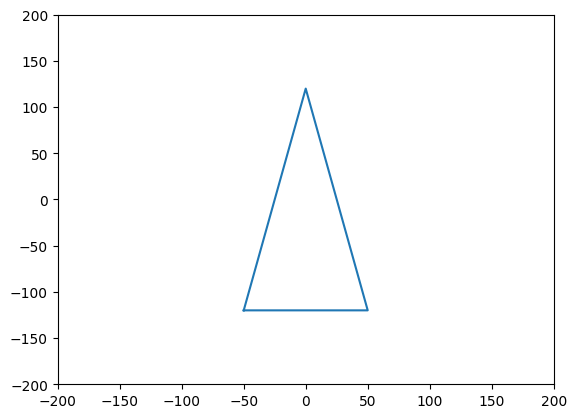

In [6]:
#масштабирование на (0.5, 1.2)
B=np.array([[0.5, 0, 0], [0, 1.2, 0], [0,0,0]])

mtrx = B@A.transpose()
mtrx2 = mtrx.transpose()

A = np.array(mtrx2)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

(100.0, 400.0)

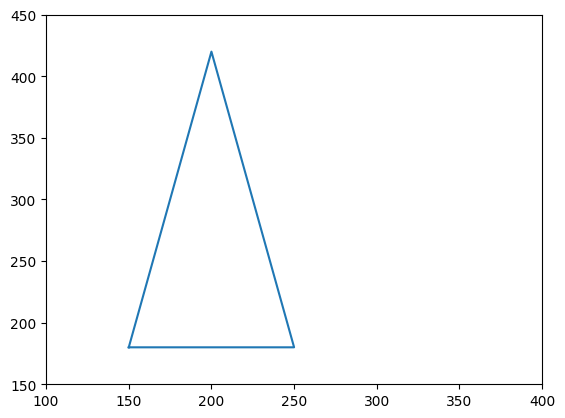

In [7]:
#смещение на (200, 300)
C = np.array([[200,300,0]])

mtrx = A + C

A = np.array(mtrx)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([150, 450])
plt.xlim([100, 400])


## Задание 3


Найдите собственные значения и собственные вектора матрицы:

In [8]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [9]:
#зададим матрицу m
m = np.array([[1, 4], [1, 1]])
m

array([[1, 4],
       [1, 1]])

In [10]:
#найдем собственные значения матрицы m
np.linalg.eigvals(m)

array([ 3., -1.])

In [11]:
#найдем собственные вектора матрицы m
e_vec = np.linalg.eig(m)[1]
e_vec

array([[ 0.89442719, -0.89442719],
       [ 0.4472136 ,  0.4472136 ]])

In [12]:
#первый "красивый" собственный вектор
vec1 = e_vec[0]/0.89442719
vec1

array([ 1., -1.])

In [13]:
#второй "красивый" собственный вектор
vec2 = e_vec[1]/0.4472136
vec2

array([0.99999999, 0.99999999])

## Задание 4


Дана функция с неизвестными параметрами a и b, вам также известны значения функции `fx` в точках `x`.

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку `error`.


In [14]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [15]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

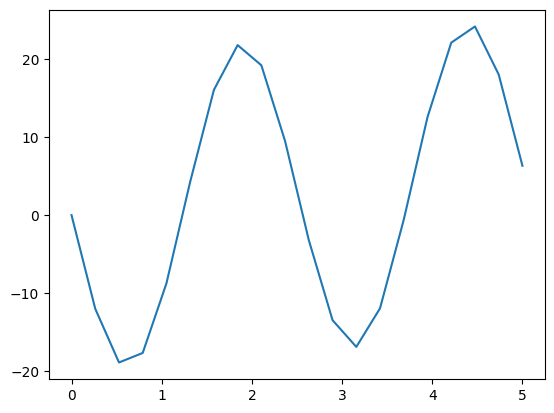

In [16]:
plt.plot(x, fx)
plt.show()

In [17]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [41]:
#зададим границы в двумерном прастранстве
bounds = [(0,100), (0,100)]

In [70]:
#используем метод дифференциальной эволюции
res = differential_evolution(error, bounds, seed =21, recombination = 0.8)
res

 message: Optimization terminated successfully.
 success: True
     fun: 1.2924706448202983e-05
       x: [ 3.000e+00  2.138e+01]
     nit: 60
    nfev: 1893

In [67]:
#проверяем минимизацию ошибок при в оптимальных a,b, т.е. res.x
result = minimize(error, res.x, method='Nelder-mead', options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 49
         Function evaluations: 93


<ipython-input-67-9c8342d52140>:2: OptimizeWarning: Unknown solver options: xtol
  result = minimize(error, res.x, method='Nelder-mead', options={'xtol': 1e-8, 'disp': True})


In [71]:
print(f'Оптимальное значение параметров a и b: ', res.x)

Оптимальное значение параметров a и b:  [ 3.         21.37610417]


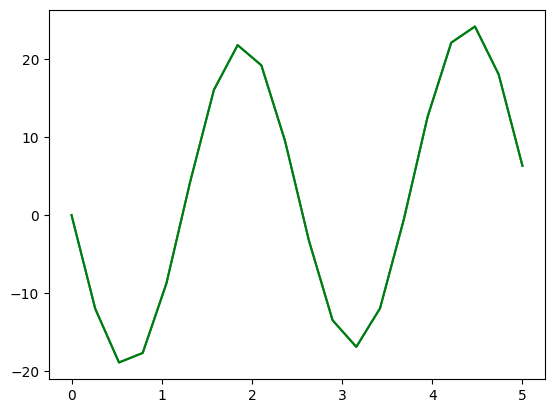

In [62]:
#дополнительно удостоверимся в результате и нарисуем график дефолтного синего цвета с учетом оптимальных a b
plt.plot(x, f(x, result.x[0], result.x[1]))
#поверх него нарисуем график на входных данных иного цвета
plt.plot(x, fx, c='green')
plt.show()

Графики совпали идеально, параметры a и b найдены корректно

## Задание 5



Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [22]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).